In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("studentTandF16.xlsx", sheet_name="NewSheet",converters={'zips':str})

In [3]:
df.head(3)

,Unnamed: 0,distance,zips
0,0,1573,00902
1,1,1573,00921
2,2,1573,00966


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df.head(2)

,distance,zips
0,1573,00902
1,1573,00921


In [6]:
df2 = pd.read_excel("cf.xlsx", sheet_name = "1617Students",converters={'HOME ZIP':str})

In [7]:
df2.head(3)

,HOME ZIP
0,00902
1,00913
2,00921


In [8]:
df2.columns = ['HOMEZIP']

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 1 columns):
HOMEZIP    1328 non-null object
dtypes: object(1)
memory usage: 10.5+ KB


In [10]:
df2.HOMEZIP = df2.HOMEZIP.astype(str)

In [11]:
df2['zips'] = df2['HOMEZIP'].str.split('-').str.get(0)
df2.drop(['HOMEZIP'], axis = 1, inplace = True)

In [12]:
df2.tail(3)

,zips
1325,98012
1326,98012
1327,98110


In [13]:
df2.sort_values(by=['zips'], inplace = True)
df2.head()

,zips
917,00824
0,00902
1,00913
2,00921
3,00966


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
distance    1309 non-null object
zips        1309 non-null object
dtypes: object(2)
memory usage: 20.5+ KB


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 917 to 916
Data columns (total 1 columns):
zips    1328 non-null object
dtypes: object(1)
memory usage: 20.8+ KB


In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df2['zips'].value_counts())

21620    39
21146    14
21617    14
21601    11
19709    11
21093    10
21042    10
21228    10
21401     9
21122     9
21136     8
08057     8
21120     8
21784     8
21015     8
21014     7
21286     7
20910     7
21108     7
21204     7
21771     6
19348     6
21043     6
21678     6
19064     6
21111     6
19734     6
19938     6
19707     5
21921     5
19963     5
20735     5
21666     5
08302     5
21651     5
11746     5
19711     5
19382     5
21037     5
19803     5
21613     5
19083     5
19808     5
21157     5
21212     5
21050     5
21117     5
21061     5
20902     5
19977     5
20720     4
21244     4
21114     4
19063     4
20904     4
21673     4
19702     4
21152     4
21801     4
21645     4
21234     4
20853     4
19956     4
21901     4
19010     4
19380     4
21804     4
19352     4
19720     4
21409     4
20901     4
21035     4
21919     4
20817     4
21811     4
21742     3
21154     3
19038     3
20176     3
21787     3
17545     3
21623     3
20721     3
0689

In [17]:
df.drop_duplicates(subset ="zips", 
                     keep = 'first', inplace = True) 
df2.drop_duplicates(subset ="zips", 
                     keep = 'first', inplace = True)  

In [18]:
'''
Delete repetitive value counts from '16 and '17
store the total number for each '17 zips
zips becomes the primary key
perform left outer join
''' 

"\nget rid of repetitive value counts from '16 and '17\nstore the total number for each '17 zips\nzips becomes the primary key\nperform left outer join\n"

In [19]:
df3 = df2.merge(df, on = 'zips', how = 'left')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 2 columns):
zips        731 non-null object
distance    555 non-null object
dtypes: object(2)
memory usage: 17.1+ KB


In [20]:
498+((38)+13+13+(2*10)+(3*9)+(2*8)+(5*7)+(5*6)+(8*5)+(23*4)+(25*3)+(44*2)+114)

1099

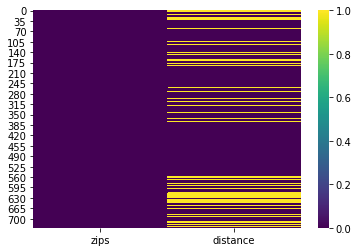

In [21]:
sns.heatmap(df3.isnull(), cmap = 'viridis')

In [22]:
#df3.to_excel('studentTandF17part2.xlsx', sheet_name = 'NewSheet') 